In [1]:
import numpy as np # Advanced mathematical functions and linear algebra
import pandas as pd # Data processing ,Data analytics and easy CSV input / output
import seaborn as sns # make a niser plots-updates matplotlib plots
import matplotlib.pyplot as plt #Basic plotting functionality like in MATLAB 
import missingno as msno # mising value visualizations
%matplotlib inline 


In [60]:
macro=pd.read_csv('../ADS-Final-Project-Sberbank/macro.csv/macro.csv')
train=pd.read_csv("../ADS-Final-Project-Sberbank/train.csv/train.csv")
test=pd.read_csv("../ADS-Final-Project-Sberbank/test.csv/test.csv")

In [61]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [62]:
Y=train['price_doc']
X=train.drop(['id','price_doc'],axis=1)

In [63]:
import random
random.seed(a=11)
columnames=np.array(train.columns.values)
objfilter=np.array(list(train.dtypes==object),dtype=bool)
objnames=columnames[objfilter]
X = X.drop(list(objnames),axis=1)
X = X.astype(np.float32)


## Remove remove the outliers  (convert to NaN  ) and then  deal this all NaN together ## 

After the first try, we undestend that we can't continue antil we remove the NaN. 
For this reason we  disedet diea lthis out outliers and convert them to NaN and then dieal this NaN and fill the miss data.

** Firs we want to convert the NaN  to other values and  run the GBR  and If it will work  we will go back and deal thith the outliers **

In [64]:
from sklearn.preprocessing import Imputer
# Creat out impute to replace missing values with the mean
imp=Imputer(missing_values='NaN', strategy='mean', axis=0)
#imp=imp.fit(X)

In [65]:
# Impute our data
imp_X=pd.DataFrame(imp.fit_transform(X))
imp_X.columns=X.columns
imp_X.index=X.index

In [66]:
# devide the data to train and test (only to train)
rows=random.sample(range(0,len(train)-1), int(len(train)*0.9))
xtrain=imp_X.ix[rows]
ytrain=Y.ix[rows]
xtest=imp_X.drop(rows)
ytest=Y.drop(rows)

In [67]:
# sort the data by the  house prices 


testdata=pd.concat([xtest,ytest],axis=1)
testdataSort=testdata.sort_values(['price_doc'])
testdataSort
#plt.scatter(range(train.shape[0]),np.sort(train.price_doc),s=3)


,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
2568,76.0,45.000000,14.000000,12.558974,1.827121,3068.057038,1.909804,6.399301,2.107025,11391678.00,...,1.0,0.0,0.0,4.0,6.0,0.0,0.0,9.0,1.0,476902
2073,53.0,29.000000,4.000000,12.558974,1.827121,3068.057038,1.909804,6.399301,2.107025,9589337.00,...,15.0,3.0,0.0,15.0,27.0,0.0,10.0,70.0,14.0,500000
26190,41.0,25.000000,1.000000,5.000000,2.000000,1962.000000,2.000000,5.000000,2.000000,3998216.25,...,39.0,8.0,2.0,19.0,37.0,2.0,12.0,78.0,10.0,990000
18875,37.0,19.000000,7.000000,16.000000,1.000000,1979.000000,1.000000,8.000000,2.000000,14286991.00,...,2.0,1.0,0.0,4.0,7.0,0.0,0.0,22.0,5.0,990000
3422,38.0,21.000000,12.000000,12.558974,1.827121,3068.057038,1.909804,6.399301,2.107025,16751119.00,...,22.0,8.0,2.0,4.0,16.0,0.0,0.0,57.0,3.0,990000
2566,31.0,18.000000,2.000000,12.558974,1.827121,3068.057038,1.909804,6.399301,2.107025,4190070.50,...,5.0,2.0,0.0,6.0,13.0,0.0,2.0,40.0,5.0,990000
2422,31.0,22.000000,4.000000,12.558974,1.827121,3068.057038,1.909804,6.399301,2.107025,11638050.00,...,290.0,124.0,23.0,77.0,136.0,1.0,73.0,172.0,8.0,990000
421,23.0,16.000000,4.000000,12.558974,1.827121,3068.057038,1.909804,6.399301,2.107025,8338438.50,...,7.0,0.0,0.0,9.0,7.0,1.0,1.0,38.0,1.0,990000
16933,101.0,94.000000,3.000000,10.000000,2.000000,2000.000000,3.000000,12.000000,3.000000,15094875.00,...,3.0,1.0,0.0,6.0,15.0,0.0,4.0,27.0,6.0,990000
2236,58.0,57.000000,5.000000,12.558974,1.827121,3068.057038,1.909804,6.399301,2.107025,18036436.00,...,24.0,8.0,0.0,7.0,20.0,0.0,2.0,88.0,9.0,990000


In [68]:
ytest=testdataSort['price_doc']
xtest=testdataSort.drop(['price_doc'],axis=1)


In [69]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 6,
          'learning_rate': 0.1,'loss':'huber','alpha':0.95}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(xtrain, ytrain)
mse = mean_squared_error(ytest, clf.predict(xtest))
print("MSE: %.4f" % mse)

MSE: 7146955624442.3154


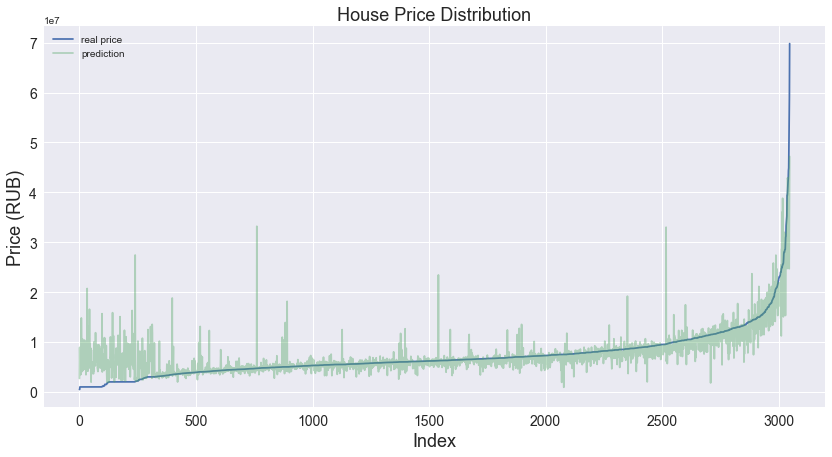

In [70]:
# 
plt.figure(figsize=(14,7))
plt.plot(range(xtest.shape[0]),ytest, label='real price')
plt.plot(range(xtest.shape[0]), clf.predict(xtest),label='prediction',alpha=0.4)
plt.legend()

plt.xlabel('Index', fontsize=18)
plt.ylabel('Price (RUB)',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('House Price Distribution',fontsize=18)
plt.show()

MSE: 6996962167026.8311


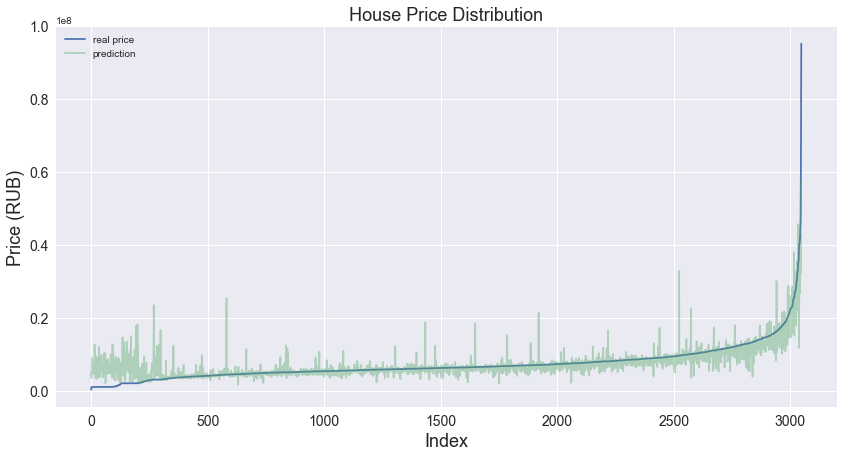

In [48]:
# Fit regression model-change some 
params = {'n_estimators': 500, 'max_depth': 8,
          'learning_rate': 0.1,'loss':'ls',
          'min_samples_split': 300, }
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(xtrain, ytrain)
mse = mean_squared_error(ytest, clf.predict(xtest))
print("MSE: %.4f" % mse)

#  plot the ress
plt.figure(figsize=(14,7))
plt.plot(range(xtest.shape[0]),ytest, label='real price')
plt.plot(range(xtest.shape[0]), clf.predict(xtest),label='prediction',alpha=0.4)
plt.legend()

plt.xlabel('Index', fontsize=18)
plt.ylabel('Price (RUB)',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('House Price Distribution',fontsize=18)
plt.show()

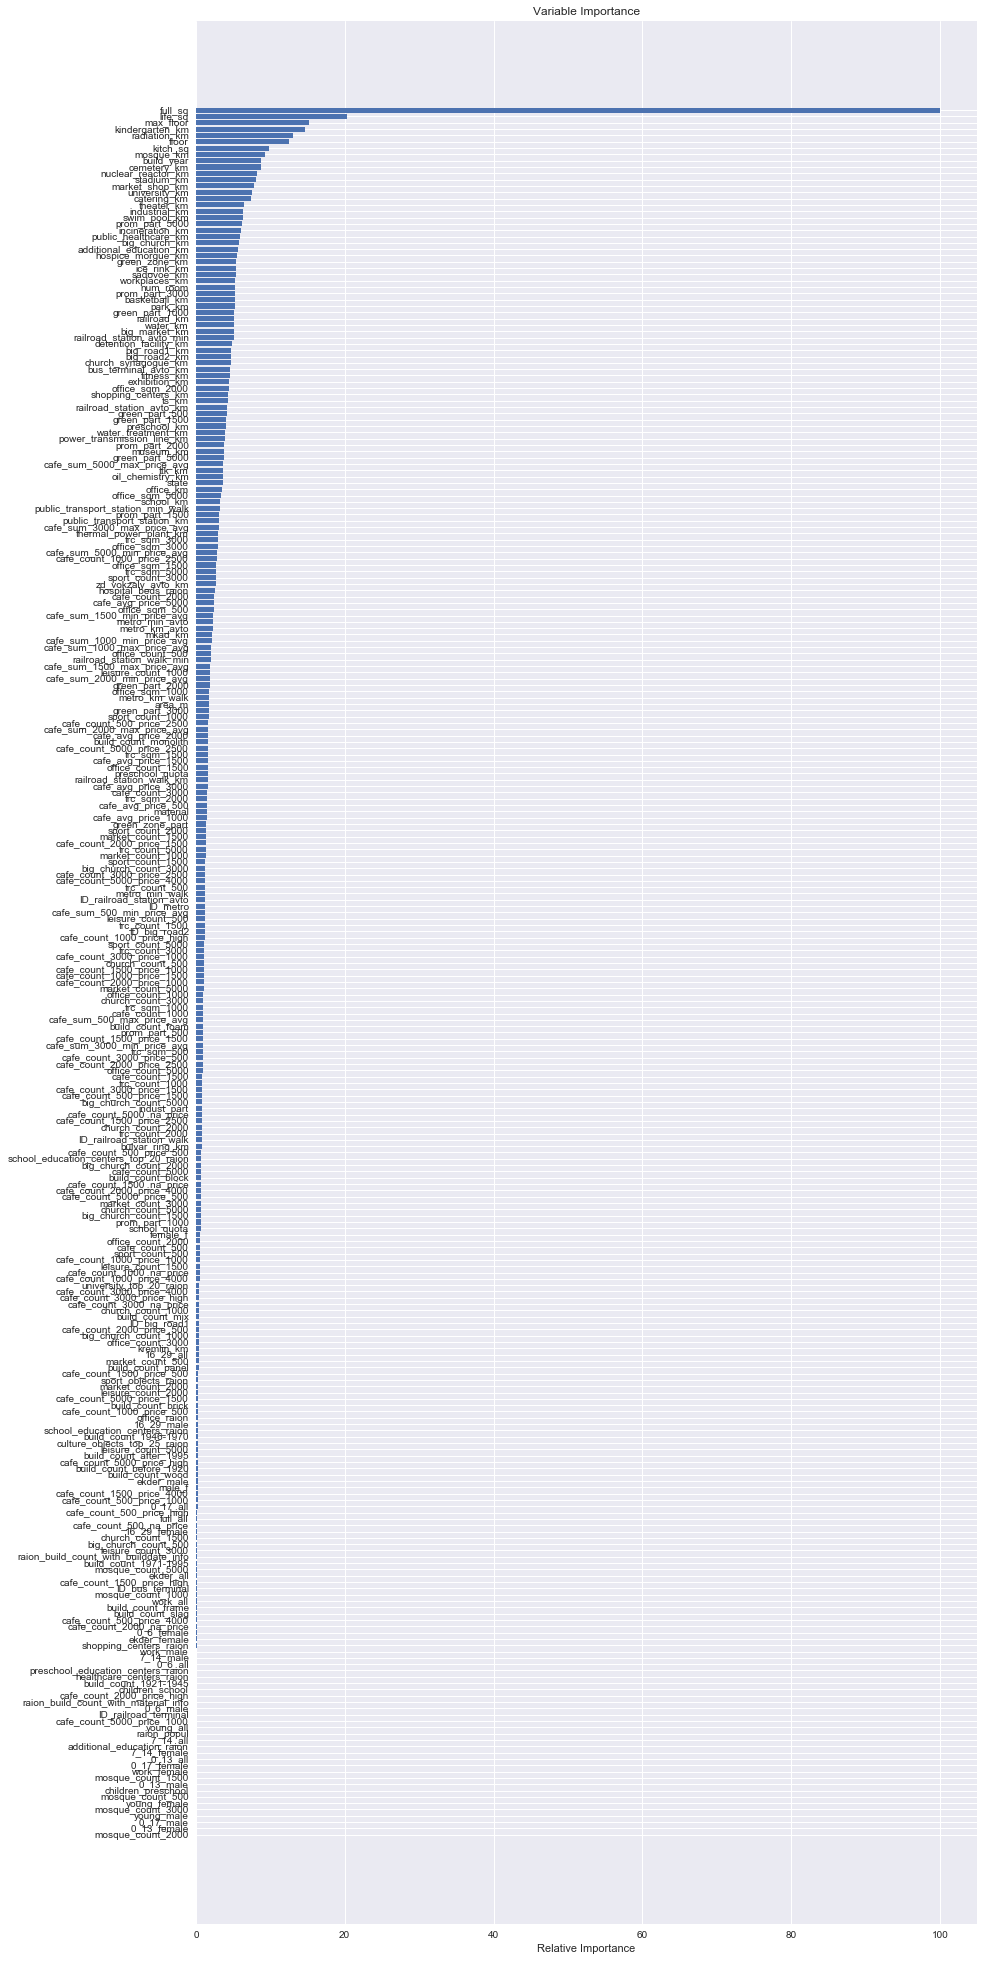

In [59]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
highfeatures=feature_importance[sorted_idx];
highnames=np.array(xtrain.columns.values)[sorted_idx];
plt.figure(figsize=(14,35))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(xtrain.columns.values)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [56]:
pos

array([   0.5,    1.5,    2.5,    3.5,    4.5,    5.5,    6.5,    7.5,
          8.5,    9.5,   10.5,   11.5,   12.5,   13.5,   14.5,   15.5,
         16.5,   17.5,   18.5,   19.5,   20.5,   21.5,   22.5,   23.5,
         24.5,   25.5,   26.5,   27.5,   28.5,   29.5,   30.5,   31.5,
         32.5,   33.5,   34.5,   35.5,   36.5,   37.5,   38.5,   39.5,
         40.5,   41.5,   42.5,   43.5,   44.5,   45.5,   46.5,   47.5,
         48.5,   49.5,   50.5,   51.5,   52.5,   53.5,   54.5,   55.5,
         56.5,   57.5,   58.5,   59.5,   60.5,   61.5,   62.5,   63.5,
         64.5,   65.5,   66.5,   67.5,   68.5,   69.5,   70.5,   71.5,
         72.5,   73.5,   74.5,   75.5,   76.5,   77.5,   78.5,   79.5,
         80.5,   81.5,   82.5,   83.5,   84.5,   85.5,   86.5,   87.5,
         88.5,   89.5,   90.5,   91.5,   92.5,   93.5,   94.5,   95.5,
         96.5,   97.5,   98.5,   99.5,  100.5,  101.5,  102.5,  103.5,
        104.5,  105.5,  106.5,  107.5,  108.5,  109.5,  110.5,  111.5,
      

# Part One - remove all outliers and then convert the NaN  fro mthe outlier to  some data and then  run again  in other version third Try 